In [52]:
import pandas as pd
import numpy as np
import math
import re
import warnings
warnings.filterwarnings('ignore')

In [53]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# > Data Loading

In [54]:
df = pd.read_csv("Car details.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [56]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [58]:
#  checking for features which are having object data and numeric data inside it
cat_feature = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat_feature.append(i)
print("Feature having object datatype :\n",cat_feature)

# cat_feature = [feat for feat in df.columns if df[feat].dtypes == 'object']


Feature having object datatype :
 ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']


In [59]:
# df[cat_feature]

In [60]:
numeric_feature = []
for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float':
        numeric_feature.append(i)
print("Feature having numeric datatype :\n",numeric_feature)

Feature having numeric datatype :
 ['year', 'selling_price', 'km_driven', 'seats']


# > Data Preprocessing

### 1. Name

In [61]:
df['name'].nunique()

2058

In [62]:
df['name'].value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [63]:
1674/2058

0.8134110787172012

In [64]:
df['name'].nunique()

2058

In [65]:
df["name"].str.split(" ", expand = True, n =-1)

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Swift,Dzire,VDI,None,None,None,None,None,None
1,Skoda,Rapid,1.5,TDI,Ambition,None,None,None,None,None
2,Honda,City,2017-2020,EXi,None,None,None,None,None,None
3,Hyundai,i20,Sportz,Diesel,None,None,None,None,None,None
4,Maruti,Swift,VXI,BSIII,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,i20,Magna,None,None,None,None,None,None,None
8124,Hyundai,Verna,CRDi,SX,None,None,None,None,None,None
8125,Maruti,Swift,Dzire,ZDi,None,None,None,None,None,None
8126,Tata,Indigo,CR4,None,None,None,None,None,None,None


In [66]:
# def feature_split(df):    
#     name_feature_split = df["name"].str.split(" ", expand = True, n = 1)
#     df['manufacturer'] = name_feature_split[0]
#     return df['manufacturer']
# feature_split(df)
# df['manufacturer']

In [67]:
name_df_1 = df["name"].str.split(" ", expand = True, n = 1)

print("unique values present inside the features :", name_df_1[0].nunique())
name_df_1[0].value_counts(normalize=True)*100

# name = name_df.loc[:,0] + " " + name_df.loc[:,1]
# name_df_1["name"] = name_2
# # name_df
# name_df_2.name.value_counts()

unique values present inside the features : 32


Maruti           30.118110
Hyundai          17.408957
Mahindra          9.498031
Tata              9.030512
Toyota            6.003937
Honda             5.745571
Ford              4.884350
Chevrolet         2.829724
Renault           2.805118
Volkswagen        2.288386
BMW               1.476378
Skoda             1.291831
Nissan            0.996555
Jaguar            0.873524
Volvo             0.824311
Datsun            0.799705
Mercedes-Benz     0.664370
Fiat              0.578248
Audi              0.492126
Lexus             0.418307
Jeep              0.381398
Mitsubishi        0.172244
Force             0.073819
Land              0.073819
Isuzu             0.061516
Kia               0.049213
Ambassador        0.049213
Daewoo            0.036909
MG                0.036909
Ashok             0.012303
Opel              0.012303
Peugeot           0.012303
Name: 0, dtype: float64

In [68]:
2448/8800

0.2781818181818182

In [69]:
1415/8800

0.16079545454545455

In [70]:
name_df_2 = df["name"].str.split(" ", expand = True, n = 3)
name_2 = name_df_2.loc[:,0] + " " + name_df_2.loc[:,1]
name_df_2["name"] = name_2
name_df_2.head()
# name_df_2.name.value_counts()

,0,1,2,3,name
0,Maruti,Swift,Dzire,VDI,Maruti Swift
1,Skoda,Rapid,1.5,TDI Ambition,Skoda Rapid
2,Honda,City,2017-2020,EXi,Honda City
3,Hyundai,i20,Sportz,Diesel,Hyundai i20
4,Maruti,Swift,VXI,BSIII,Maruti Swift


In [71]:
name_df_2['name'].nunique()

210

In [72]:
name_df_2['name'].unique()

array(['Maruti Swift', 'Skoda Rapid', 'Honda City', 'Hyundai i20',
       'Hyundai Xcent', 'Maruti Wagon', 'Maruti 800', 'Toyota Etios',
       'Ford Figo', 'Renault Duster', 'Maruti Zen', 'Mahindra KUV',
       'Maruti Ertiga', 'Maruti Alto', 'Mahindra Verito', 'Honda WR-V',
       'Maruti SX4', 'Tata Tigor', 'Maruti Baleno', 'Chevrolet Enjoy',
       'Maruti Omni', 'Maruti Vitara', 'Fiat Palio', 'Hyundai Verna',
       'Datsun GO', 'Tata Safari', 'Jeep Compass', 'Toyota Fortuner',
       'Toyota Innova', 'Mercedes-Benz B', 'Honda Amaze',
       'Mitsubishi Pajero', 'Maruti Ciaz', 'Honda Jazz', 'Audi A6',
       'Toyota Corolla', 'Mercedes-Benz New', 'Tata Manza', 'Hyundai i10',
       'Volkswagen Ameo', 'Tata Indica', 'Volkswagen Vento',
       'Ford EcoSport', 'BMW X1', 'Maruti Celerio', 'Volkswagen Polo',
       'Maruti Eeco', 'Mahindra Scorpio', 'Ford Freestyle',
       'Volkswagen Passat', 'Mahindra XUV500', 'Tata Indigo',
       'Nissan Terrano', 'Hyundai Creta', 'Renault KWID',

In [73]:
name_df_3 = df["name"].str.split(" ", expand = True, n =3)
name = name_df_3.loc[:,0] + " " + name_df_3.loc[:,1] + " " + name_df_3.loc[:,2]
name_df_3["name"] = name
# name_df
name_df_3.name.value_counts()

Maruti Swift Dzire         378
Maruti Wagon R             282
Hyundai Grand i10          194
Toyota Innova 2.5          185
Maruti Swift VDI           146
                          ... 
Volkswagen Multivan TDI      1
Tata Tiago Wizz              1
Maruti Swift 1.2             1
Mahindra Verito 1.6          1
Chevrolet Cruze LT           1
Name: name, Length: 696, dtype: int64

In [74]:
name_df_3.name.nunique()


696

In [75]:
# name_df_3.name.unique()

In [76]:
df['manufacturer'] = name_df_1[0]

In [77]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufacturer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  manufacturer   8128 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 889.1+ KB


### 2.Year

In [79]:
df['year'].nunique()

29

In [80]:
df['year'].value_counts()

2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: year, dtype: int64

In [81]:
df.groupby('year').get_group(2017).head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufacturer
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai
21,Honda WR-V i-DTEC VX,2017,950000,50000,Diesel,Individual,Manual,First Owner,25.5 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0,Honda
26,Maruti Alto 800 LXI,2017,275000,28000,Petrol,Individual,Manual,First Owner,24.7 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,Maruti
30,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0,Maruti
34,Maruti Vitara Brezza LDi,2017,650000,16200,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0,Maruti


In [82]:
# df.rename({'year':"purchase_year"}, axis = 1, inplace = True) # purchased year of model

In [83]:
import datetime
def feature_create(df):
    today = datetime.date.today() 
    yr = today.year
    print(type(yr))
    xyz = df['year'].astype(int)
    print(type(xyz))

    df['car_age'] = yr - (xyz)
    return df['car_age']
feature_create(df)


<class 'int'>
<class 'pandas.core.series.Series'>


0        9
1        9
2       17
3       13
4       16
        ..
8123    10
8124    16
8125    14
8126    10
8127    10
Name: car_age, Length: 8128, dtype: int32

In [84]:
#Differene between Current year and initial year
import datetime 
today = datetime.date.today() 
yr = today.year

df['car_age'] = yr - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufacturer,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16


In [85]:
df['car_age'].head(5)

0     9
1     9
2    17
3    13
4    16
Name: car_age, dtype: int64

In [86]:
# (df.car_age).dtypes

### 5.fuel

In [87]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [88]:
df['fuel'].value_counts().to_dict()

{'Diesel': 4402, 'Petrol': 3631, 'CNG': 57, 'LPG': 38}

In [89]:
# df['fuel'].replace({'Diesel': 3, 'Petrol': 2, 'CNG': 1, 'LPG': 0}, inplace = True)

In [90]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufacturer,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,9


### 6.seller_type

In [91]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [92]:
df['seller_type'].value_counts().to_dict()

{'Individual': 6766, 'Dealer': 1126, 'Trustmark Dealer': 236}

In [93]:
# df['seller_type'].replace({'Individual': 2, 'Dealer': 1, 'Trustmark Dealer': 0}, inplace = True)

### 7. transmission

In [94]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [95]:
df['transmission'].value_counts().to_dict()

{'Manual': 7078, 'Automatic': 1050}

In [96]:
# df['transmission'].replace({'Manual': 0, 'Automatic': 1}, inplace =True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  manufacturer   8128 non-null   object 
 14  car_age        8128 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 952.6+ KB


In [98]:
# df[['owner']]

### 8.owner

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [101]:
# label_enc = LabelEncoder()
# df['owner'] = label_enc.fit_transform(df[['owner']])
# df['owner'].value_counts()

In [102]:
# df['owner'] = df['owner'].astype('int64')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  manufacturer   8128 non-null   object 
 14  car_age        8128 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 952.6+ KB


In [104]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
manufacturer       0
car_age            0
dtype: int64

### 9.mileage

In [105]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufacturer,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16


In [106]:
kmkg = 0
kmpl = 0

for i in df.mileage:
    if str(i).endswith('km/kg'):
        kmkg += 1
    elif str(i).endswith('kmpl'):
        kmpl += 1
print("no. of records having unit km/kg", kmkg)
print("no. of records having unit kmpl", kmpl)

no. of records having unit km/kg 88
no. of records having unit kmpl 7819


In [107]:
# df[df['mileage"] != 'NaN']

In [108]:
df["mileage"].head(3)

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
Name: mileage, dtype: object

In [109]:
s = "21.14 kmpl"
print(len(s))
s[0:-5:1]

10


'21.14'

In [110]:
s1 = "18.5 kmpl"
print(len(s1))
s1[0:-5:1]

9


'18.5'

In [111]:
corrected_mileage = []
for i in df.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i) * 1.40    # 1.40 is unit conversion value for km/kg to kmpl
        corrected_mileage.append(float(i))

    elif str(i).endswith('kmpl'):
        i = i[:-6]
        corrected_mileage.append(float(i))


In [112]:
df['corrected_mileage(kmpl)'] = pd.Series(corrected_mileage)


In [113]:
df['corrected_mileage(kmpl)']

0       23.0
1       21.1
2       17.0
3       23.0
4       16.0
        ... 
8123     NaN
8124     NaN
8125     NaN
8126     NaN
8127     NaN
Name: corrected_mileage(kmpl), Length: 8128, dtype: float64

In [114]:

# def feature_creation_mileage(df):
#     corrected_mileage = []
#     for i in df.mileage:
#         if str(i).endswith('km/kg'):
#             i = i[:-6]
#             i = float(i) * 1.40    # 1.40 is unit conversion value for km/kg to kmpl
#             corrected_mileage.append(float(i))

#         elif str(i).endswith('kmpl'):
#             i = i[:-6]
#             corrected_mileage.append(float(i))
#     df['corrected_mileage(kmpl)'] = pd.Series(corrected_mileage)   
#     return df['corrected_mileage(kmpl)']
# feature_creation_mileage(df)


### 10.engine

In [115]:
df.engine.value_counts()

1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: engine, Length: 121, dtype: int64

In [116]:
cc = 0
not_cc = 0
not_cc_list = []
for i in df.engine:
    if str(i).endswith('CC'):
        cc += 1
    else:
        not_cc += 1
        not_cc_list.append(i)
print("no. of records whose engine size is in CC : ",cc)
print("no. of records whose engine size not in CC : ",not_cc)   
# not_cc_list

no. of records whose engine size is in CC :  7907
no. of records whose engine size not in CC :  221


In [117]:
df.engine.isnull().sum()

221

In [118]:
df.shape

(8128, 16)

In [119]:
8218-7907

311

In [120]:
df.isna().sum()

name                         0
year                         0
selling_price                0
km_driven                    0
fuel                         0
seller_type                  0
transmission                 0
owner                        0
mileage                    221
engine                     221
max_power                  215
torque                     222
seats                      221
manufacturer                 0
car_age                      0
corrected_mileage(kmpl)    221
dtype: int64

In [121]:
311-221

90

In [122]:
engine_size = []
for i in df.engine:
    if str(i).endswith('CC'):
        i = i[:-3]
        engine_size.append(int(i))
len(engine_size)

7907

In [123]:
df["engine_size"] = df["engine"].str.split(" ", expand = True, n =1)[0]
type(df["engine_size"])
# name_2 = name_df_2.loc[:,0] + " " + name_df_2.loc[:,1]
# name_df_2["name"] = name_2
# name_df_2.head()
# name_df_2.name.value_counts()

pandas.core.series.Series

In [124]:
# def feature_extraction_engine_size(df):
#     df["engine_size"] = df["engine"].str.split(" ", expand = True, n =1)[0]
#     df["engine_size"] = df["engine_size"].astype("float")
#     return df["engine_size"]
# feature_extraction_engine_size(df)

In [125]:
df["engine_size"] = df["engine_size"].astype(float)

In [126]:
df["engine_size"].isna().sum()

221

In [127]:
# df.info()

### 11.max_power

In [128]:
# def maximum_power(data):
#     max_power = df['max_power'].str.replace(' bhp','')
#     return max_power
# df['max_power'] = df['max_power'].apply(maximum_power)
# df.head(2)

In [129]:
df['max_power'] = df['max_power'].str.replace(' bhp','')
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufacturer,car_age,corrected_mileage(kmpl),engine_size
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74,190Nm@ 2000rpm,5.0,Maruti,9,23.0,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,9,21.1,1498.0


In [130]:
(df['max_power']).dtypes

dtype('O')

In [131]:

df['max_power'] = pd.to_numeric(df['max_power'])
(df['max_power']).dtypes

dtype('float64')

In [132]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufacturer,car_age,corrected_mileage(kmpl),engine_size
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.00,190Nm@ 2000rpm,5.0,Maruti,9,23.0,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0,Skoda,9,21.1,1498.0


In [133]:
# def feature_extraction_engine_size(df):
#     df['max_power'] = df['max_power'].str.replace(' bhp','')
#     df['max_power'] = pd.to_numeric(df['max_power'])
#     return df['max_power']
# feature_extraction_engine_size(df)

## lets drop irrelevent features

In [134]:
df.drop(['name','mileage','engine','torque'], axis = 1, inplace = True)


In [135]:
df.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,seats,manufacturer,car_age,corrected_mileage(kmpl),engine_size
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,5.0,Maruti,9,23.0,1248.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5.0,Skoda,9,21.1,1498.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78.00,5.0,Honda,17,17.0,1497.0


In [136]:
df.rename({"fuel" : "fuel_type","max_power" : "max_power(bhp)"
         ,"engine_size" : "engine_size(cc)"}, inplace = True, axis = 1)

In [137]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel_type', 'seller_type',
       'transmission', 'owner', 'max_power(bhp)', 'seats', 'manufacturer',
       'car_age', 'corrected_mileage(kmpl)', 'engine_size(cc)'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     8128 non-null   int64  
 1   selling_price            8128 non-null   int64  
 2   km_driven                8128 non-null   int64  
 3   fuel_type                8128 non-null   object 
 4   seller_type              8128 non-null   object 
 5   transmission             8128 non-null   object 
 6   owner                    8128 non-null   object 
 7   max_power(bhp)           7912 non-null   float64
 8   seats                    7907 non-null   float64
 9   manufacturer             8128 non-null   object 
 10  car_age                  8128 non-null   int64  
 11  corrected_mileage(kmpl)  7907 non-null   float64
 12  engine_size(cc)          7907 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 825.6+ KB


## Handling Missing value 

### max_power(bhp)

In [139]:
list(np.where(df.isna().sum() > 1)[0])

[7, 8, 11, 12]

In [140]:
missing_value_features = list(df.iloc[: , list(np.where(df.isna().sum() > 0)[0]) ].columns)
missing_value_features
# for i in missing_value_features:
#     print(i)

['max_power(bhp)', 'seats', 'corrected_mileage(kmpl)', 'engine_size(cc)']

In [141]:
print(f"meidian of max_power(bhp) :",df['max_power(bhp)'].median())

print(f"mean of max_power(bhp) :",df['max_power(bhp)'].mean())

print(f"mode of max_power(bhp) :",df['max_power(bhp)'].mode())

meidian of max_power(bhp) : 82.0
mean of max_power(bhp) : 91.51791898382159
mode of max_power(bhp) : 0    74.0
dtype: float64


In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
# %inline matplotlib

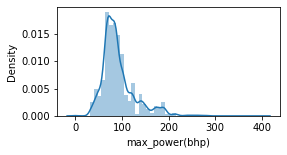

In [143]:
plt.figure(figsize = (4,2))
sns.distplot(df['max_power(bhp)'])
plt.show()

<AxesSubplot:xlabel='max_power(bhp)'>

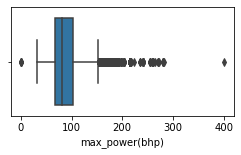

In [144]:
plt.figure(figsize = (4,2))
sns.boxplot(x= df['max_power(bhp)'])

In [145]:
# df.loc[df['max_power(bhp)'] > 150]

In [146]:
579/8058

0.07185405807892778

In [147]:
# df.groupby('max_power(bhp)').get_group(150)

In [148]:
# np.where(df[['max_power(bhp)']] == 'nan')

In [149]:
df['max_power(bhp)'].isna().sum()

216

In [150]:
df['max_power(bhp)'].fillna(df['max_power(bhp)'].mean(), inplace = True)

In [151]:
df['max_power(bhp)'].isna().sum()

0

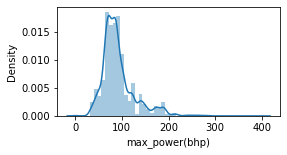

In [152]:
plt.figure(figsize = (4,2))
sns.distplot(df['max_power(bhp)'])
plt.show()

<AxesSubplot:xlabel='max_power(bhp)'>

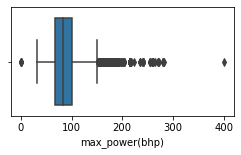

In [153]:
plt.figure(figsize = (4,2))
sns.boxplot(x= df['max_power(bhp)'])

In [154]:
print("median :",df['max_power(bhp)'].median())
print("mean :",df['max_power(bhp)'].mean())
print("mode :",df['max_power(bhp)'].mode())

median : 83.1
mean : 91.51791898382166
mode : 0    74.0
dtype: float64


### `as we filled missing values with mean of max_power(bhp) so there is no affect on mean, mode and median of that feture. `

### seats

In [155]:
df['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [156]:
df['seats'].value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [157]:
print("Statistical values before handling missing values :\n")
print("median :",df['seats'].median())
print("mean :",df['seats'].mean())
print("mode :",df['seats'].mode()[0])

Statistical values before handling missing values :

median : 5.0
mean : 5.41671936259011
mode : 5.0


<AxesSubplot:xlabel='seats', ylabel='Density'>

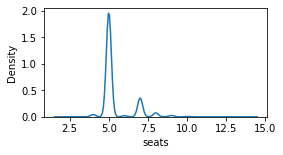

In [158]:
plt.figure(figsize = (4,2))
sns.kdeplot(df['seats'])

In [159]:
df['seats'].fillna(df['seats'].mode()[0], inplace = True)

In [160]:
print("*********Statistical values after handling missing values******** :\n")
print("median :",df['seats'].median())
print("mean :",df['seats'].mean())
print("mode :",df['seats'].mode()[0])

*********Statistical values after handling missing values******** :

median : 5.0
mean : 5.405388779527559
mode : 5.0


In [161]:
df['seats'].isna().sum()

0

AxesSubplot(0.125,0.125;0.775x0.755)


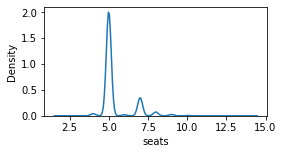

In [162]:
plt.figure(figsize = (4,2))
print(sns.kdeplot(df['seats']))
plt.show()
# plt.figure(figsize = (4,2))
# print(sns.boxplot(x= df['seats']))
# plt.show()

### `as we filled missing values with "mode" of no_of_seat so there is no affect on mean, mode and median of that feature. `

In [163]:
# df.info()

### corrected_mileage(kmpl)

In [164]:
df['corrected_mileage(kmpl)'].isna().sum()

221

In [165]:
print("*********Statistical values before handling missing values******** :\n")
print("median :",df['corrected_mileage(kmpl)'].median())
print("mean :",df['corrected_mileage(kmpl)'].mean())
print("mode :",df['corrected_mileage(kmpl)'].mode()[0])

*********Statistical values before handling missing values******** :

median : 19.0
mean : 19.277143290754974
mode : 18.0


AxesSubplot(0.125,0.125;0.775x0.755)


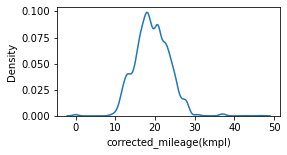

AxesSubplot(0.125,0.125;0.775x0.755)


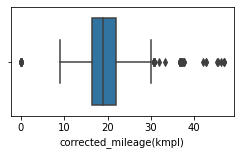

In [166]:
plt.figure(figsize = (4,2))
print(sns.kdeplot(df['corrected_mileage(kmpl)']))
plt.show()
plt.figure(figsize = (4,2))
print(sns.boxplot(x= df['corrected_mileage(kmpl)']))
plt.show()

In [167]:
df['corrected_mileage(kmpl)'].fillna(df['corrected_mileage(kmpl)'].mean(), inplace = True)

In [168]:
print("*********Statistical values after handling missing values********* :\n")
print("median :",df['corrected_mileage(kmpl)'].median())
print("mean :",df['corrected_mileage(kmpl)'].mean())
print("mode :",df['corrected_mileage(kmpl)'].mode()[0])

*********Statistical values after handling missing values********* :

median : 19.0
mean : 19.277143290755145
mode : 18.0


### >>`as we filled missing values with mean of 'corrected_mileage(kmpl)' so there is no affect on mean, mode and median of that feature. `

### engine_size(cc)  

In [169]:
print("*********Statistical values before handling missing values********* :\n")
print("median :",df['engine_size(cc)'].median())
print("mean :",df['engine_size(cc)'].mean())
print("mode :",df['engine_size(cc)'].mode()[0])

*********Statistical values before handling missing values********* :

median : 1248.0
mean : 1458.625015808777
mode : 1248.0


AxesSubplot(0.125,0.125;0.775x0.755)


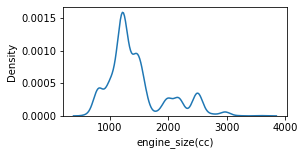

AxesSubplot(0.125,0.125;0.775x0.755)


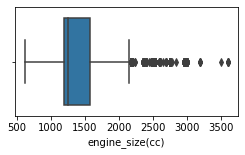

In [170]:
plt.figure(figsize = (4,2))
print(sns.kdeplot(df['engine_size(cc)']))
plt.show()
plt.figure(figsize = (4,2))
print(sns.boxplot(x= df['engine_size(cc)']))
plt.show()

In [171]:
df['engine_size(cc)'].fillna(df['engine_size(cc)'].median(), inplace = True)

In [172]:
df['engine_size(cc)'].isnull().sum()

0

In [173]:
print("*********Statistical values after handling missing values********* :\n")
print("median :",df['engine_size(cc)'].median())
print("mean :",df['engine_size(cc)'].mean())
print("mode :",df['engine_size(cc)'].mode()[0])

*********Statistical values after handling missing values********* :

median : 1248.0
mean : 1452.8981299212599
mode : 1248.0


### >>`as we filled missing values with mean of 'engine_size(cc)' so there is no affect on mean, mode and median of that feature.`

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     8128 non-null   int64  
 1   selling_price            8128 non-null   int64  
 2   km_driven                8128 non-null   int64  
 3   fuel_type                8128 non-null   object 
 4   seller_type              8128 non-null   object 
 5   transmission             8128 non-null   object 
 6   owner                    8128 non-null   object 
 7   max_power(bhp)           8128 non-null   float64
 8   seats                    8128 non-null   float64
 9   manufacturer             8128 non-null   object 
 10  car_age                  8128 non-null   int64  
 11  corrected_mileage(kmpl)  8128 non-null   float64
 12  engine_size(cc)          8128 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 825.6+ KB


### Manufacturer`

In [175]:
df['manufacturer'].nunique()

32

In [176]:
# label_encoder = LabelEncoder()
# df['manufacturer'] = label_encoder.fit_transform(df[['manufacturer']])


In [177]:
df['manufacturer'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [178]:
df.head(5)

,year,selling_price,km_driven,fuel_type,seller_type,transmission,owner,max_power(bhp),seats,manufacturer,car_age,corrected_mileage(kmpl),engine_size(cc)
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,74.00,5.0,Maruti,9,23.0,1248.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,5.0,Skoda,9,21.1,1498.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78.00,5.0,Honda,17,17.0,1497.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,5.0,Hyundai,13,23.0,1396.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.20,5.0,Maruti,16,16.0,1298.0


- `as we done with preprocessing and cleaning of data, we have created dataframe which will be useful for EDA and to getting maximum insights from the data`

# EDA

### ` let's start with EDA `

In [179]:
# df.to_csv("car_price_prediction_EDA_1.csv")

In [180]:
eda_df = df.copy()

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     8128 non-null   int64  
 1   selling_price            8128 non-null   int64  
 2   km_driven                8128 non-null   int64  
 3   fuel_type                8128 non-null   object 
 4   seller_type              8128 non-null   object 
 5   transmission             8128 non-null   object 
 6   owner                    8128 non-null   object 
 7   max_power(bhp)           8128 non-null   float64
 8   seats                    8128 non-null   float64
 9   manufacturer             8128 non-null   object 
 10  car_age                  8128 non-null   int64  
 11  corrected_mileage(kmpl)  8128 non-null   float64
 12  engine_size(cc)          8128 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 825.6+ KB


### >>`there are total 13 features which is useful for further analysis after cleaning the data and dropping some unnecessary features like torque and name of car. We have 5 features having object data type and 8 featurs having numeric values. `

In [182]:

numeric_col = eda_df.select_dtypes(np.number)
numeric_col.head(2)

,year,selling_price,km_driven,max_power(bhp),seats,car_age,corrected_mileage(kmpl),engine_size(cc)
0,2014,450000,145500,74.00,5.0,9,23.0,1248.0
1,2014,370000,120000,103.52,5.0,9,21.1,1498.0


In [183]:
categ_col = eda_df.select_dtypes('object')
categ_col.head(2)

,fuel_type,seller_type,transmission,owner,manufacturer
0,Diesel,Individual,Manual,First Owner,Maruti
1,Diesel,Individual,Manual,Second Owner,Skoda


In [184]:
eda_df.describe()

,year,selling_price,km_driven,max_power(bhp),seats,car_age,corrected_mileage(kmpl),engine_size(cc)
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.00000
mean,2013.804011,6.382718e+05,6.981951e+04,91.517919,5.405389,9.195989,19.277143,1452.89813
std,4.044249,8.062534e+05,5.655055e+04,35.343246,0.948874,4.044249,4.223493,498.19672
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,2.000000,3.000000,0.000000,624.00000
25%,2011.000000,2.549990e+05,3.500000e+04,68.100000,5.000000,6.000000,16.700000,1197.00000
50%,2015.000000,4.500000e+05,6.000000e+04,83.100000,5.000000,8.000000,19.000000,1248.00000
75%,2017.000000,6.750000e+05,9.800000e+04,101.250000,5.000000,12.000000,22.000000,1582.00000
max,2020.000000,1.000000e+07,2.360457e+06,400.000000,14.000000,40.000000,46.816000,3604.00000


In [185]:
print(eda_df.km_driven.max())
# print(eda_df.km_driven.min())

2360457


- from the above result of describe function we can easily conclude that there is a variation in data and hence some of the features may be not distributed properly. As we can see in features like km_driven, and selling_price there is huge variation in data 

## Univariate analysis of features :

In [186]:
# count_plot
def count_plot(categ_col):
#     plt.figure(figsize=(12,8))
#     plt.subplot(1,1,1)
    for i in categ_col.columns:
        countplot=sns.countplot(categ_col[i])
        plt.xticks(rotation = 90)
        
        for p in countplot.patches:
            countplot.annotate(p.get_height(), 
                            (p.get_x() + p.get_width() / 2.0, 
                             p.get_height()), 
                            ha = 'center', 
                            va = 'center', 
                            xytext = (0, 5),
                            textcoords = 'offset points')  
        plt.show()
    return countplot


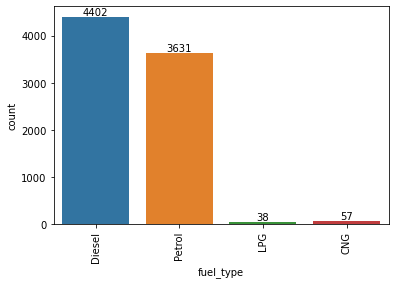

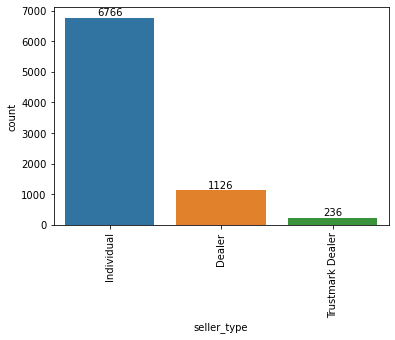

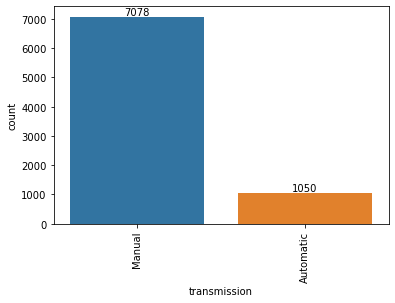

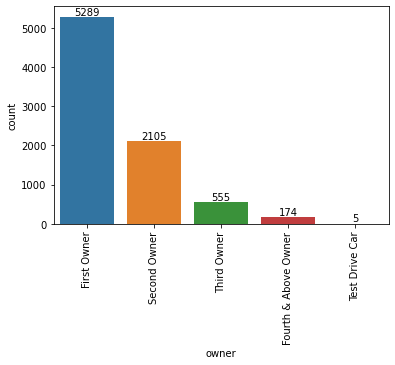

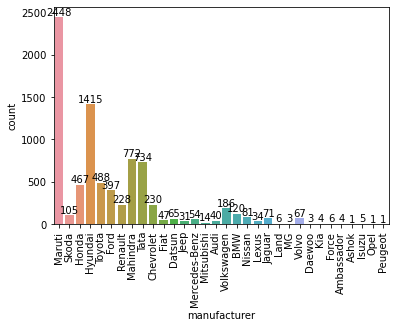

<AxesSubplot:xlabel='manufacturer', ylabel='count'>

In [187]:
count_plot(categ_col)

Text(0, 0.5, 'Count of cars')

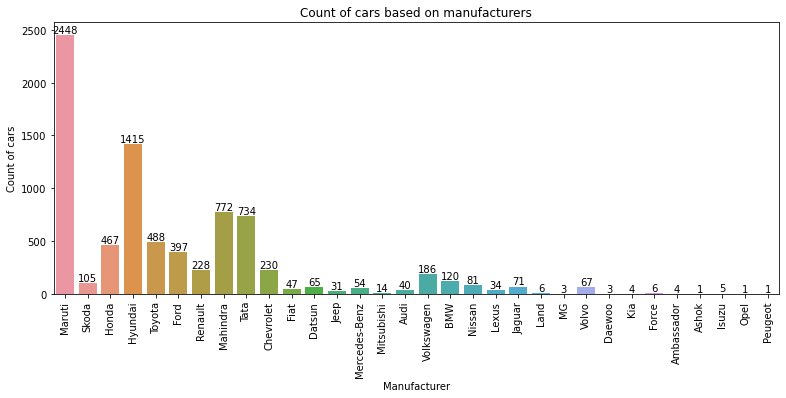

In [188]:
plt.figure(figsize = (13, 5))
plot = sns.countplot(x = 'manufacturer', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [189]:
categ_col.columns

Index(['fuel_type', 'seller_type', 'transmission', 'owner', 'manufacturer'], dtype='object')

In [190]:
def value_counts_obj(data):
    for i in categ_col.columns:
        values = categ_col[i].value_counts()
        print(f"no. of values present inside the [{i}] column  :\n",values)
        print("*"*50)


In [191]:
value_counts_obj(categ_col)

no. of values present inside the [fuel_type] column  :
 Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel_type, dtype: int64
**************************************************
no. of values present inside the [seller_type] column  :
 Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
**************************************************
no. of values present inside the [transmission] column  :
 Manual       7078
Automatic    1050
Name: transmission, dtype: int64
**************************************************
no. of values present inside the [owner] column  :
 First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64
**************************************************
no. of values present inside the [manufacturer] column  :
 Maruti           2448
Hyundai          1415
Mahindra          772
Tata     

### Conclusion :
- From above count plot of categorical feature we can clearly see that some of the features have imbalanced data alomost all features have imbalance data in it.
- This will affect our model to find patterns from the data and due to this model predictions may be bias. 

- For Fuel_Type : Diesel & petrol fuel type having maximum count while CNG & LPG is having min count >> which means people are more intrested in buying Diesel & petrol fuel type car and least intrested in buying CNG & LPG fuel type car.

- For seller_type : People are more intrested to buy car from individual car owner rather than dealer and trustmark dealer. Almost ~ 83% are buying car from individual person, and only ~ 14% people buy car from dealer.

- For transmission_type : ~ 87% people go  with manual transmission over automatic transmission, though automatic tranmission has advantage over manual but because of resale of car mentality of customer is towards manual transmission.

- For owner_type : For this feature also data is very imbalance, as in seller_type more people are intrested to buy vehicle from individual owner here also they are more intrested to buy vehicle from First owner. Below is the distribution of each owner type - First Owner : 0.650714,  Second Owner : 0.258981,  Third Owner : 0.068282,  Fourth & Above Owner : 0.021407 Test Drive Car : 0.000615

- For manufacturer : Almost ~ 50% of car purchased by people are from Maruti and Hyundai brand and rest 50% from others. So people mindset are fixed towarnds maruti and hyundai. It is having imbalance data.




### distribution plot

- lets check for normality of numeric features by ploting distribution plot

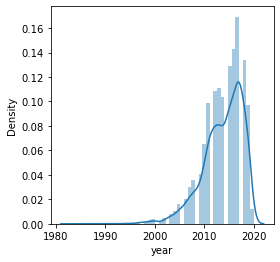

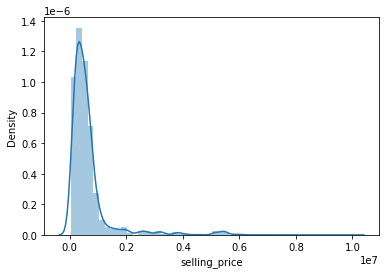

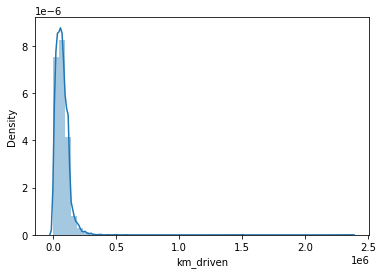

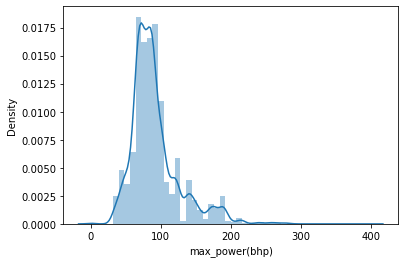

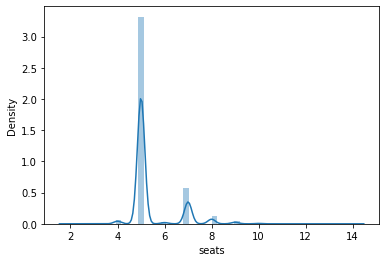

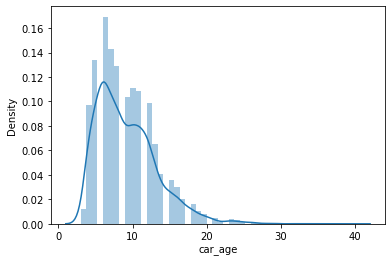

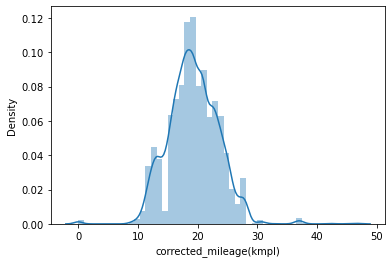

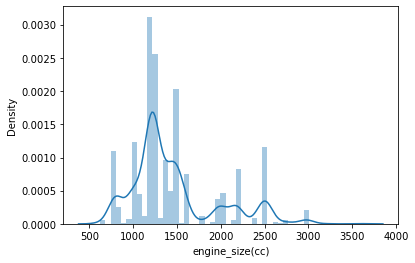

In [192]:
plt.figure(figsize = (4,4))
# count = 1
# plt.subplot(2,2,count)
for i in numeric_col:
    
    sns.distplot(eda_df[i])
#     count+=1
    plt.show()

- From the above dist_plot we can clearly analyse that only corrected mileage is following gaussian distribution curve rest are following normal distribution with some skewness in it.
- It means there are outliers in some of the features.;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

AxesSubplot(0.125,0.125;0.775x0.755)


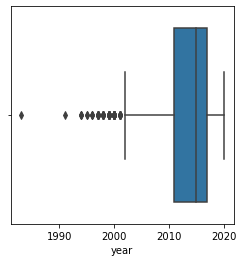

AxesSubplot(0.125,0.125;0.775x0.755)


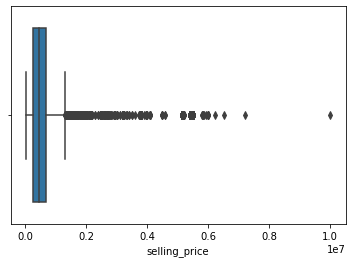

AxesSubplot(0.125,0.125;0.775x0.755)


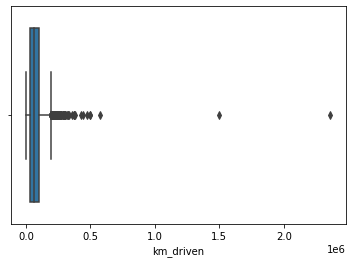

AxesSubplot(0.125,0.125;0.775x0.755)


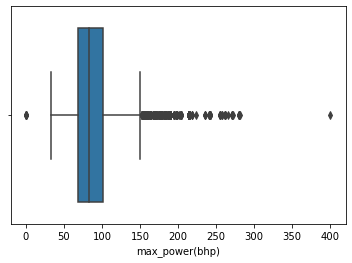

AxesSubplot(0.125,0.125;0.775x0.755)


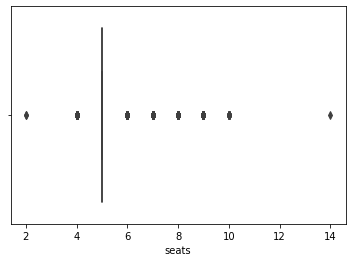

AxesSubplot(0.125,0.125;0.775x0.755)


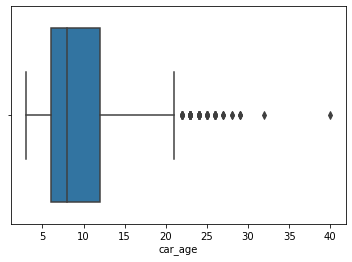

AxesSubplot(0.125,0.125;0.775x0.755)


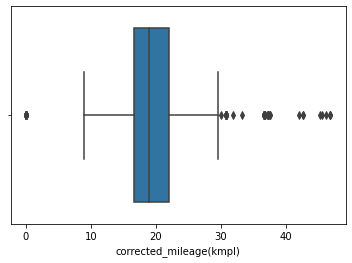

AxesSubplot(0.125,0.125;0.775x0.755)


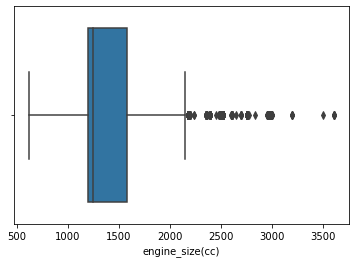

In [193]:
plt.figure(figsize = (4,4))

for i in numeric_col:
    
    print(sns.boxplot(x = eda_df[i]))
    plt.show()

- form the above box plot we can conclude that there are outliers in all the numeric features 'purchase_year', 'selling_price', 'km_driven', 'max_power(bhp)','seats', 'car_age', 'corrected_mileage(kmpl)', 'engine_size(cc)', hence we need to handle this outliers in feature engineering.

## Bi-variate Analysis

In [194]:
eda_df.corr()

,year,selling_price,km_driven,max_power(bhp),seats,car_age,corrected_mileage(kmpl),engine_size(cc)
year,1.000000,0.414092,-0.418006,0.213282,0.010222,-1.000000,0.024003,0.035851
selling_price,0.414092,1.000000,-0.225534,0.744958,0.047135,-0.414092,-0.000990,0.458345
km_driven,-0.418006,-0.225534,1.000000,-0.037714,0.219860,0.418006,-0.003537,0.198911
max_power(bhp),0.213282,0.744958,-0.037714,1.000000,0.191785,-0.213282,-0.005985,0.701298
seats,0.010222,0.047135,0.219860,0.191785,1.000000,-0.010222,-0.012364,0.612220
car_age,-1.000000,-0.414092,0.418006,-0.213282,-0.010222,1.000000,-0.024003,-0.035851
corrected_mileage(kmpl),0.024003,-0.000990,-0.003537,-0.005985,-0.012364,-0.024003,1.000000,-0.014433
engine_size(cc),0.035851,0.458345,0.198911,0.701298,0.612220,-0.035851,-0.014433,1.000000


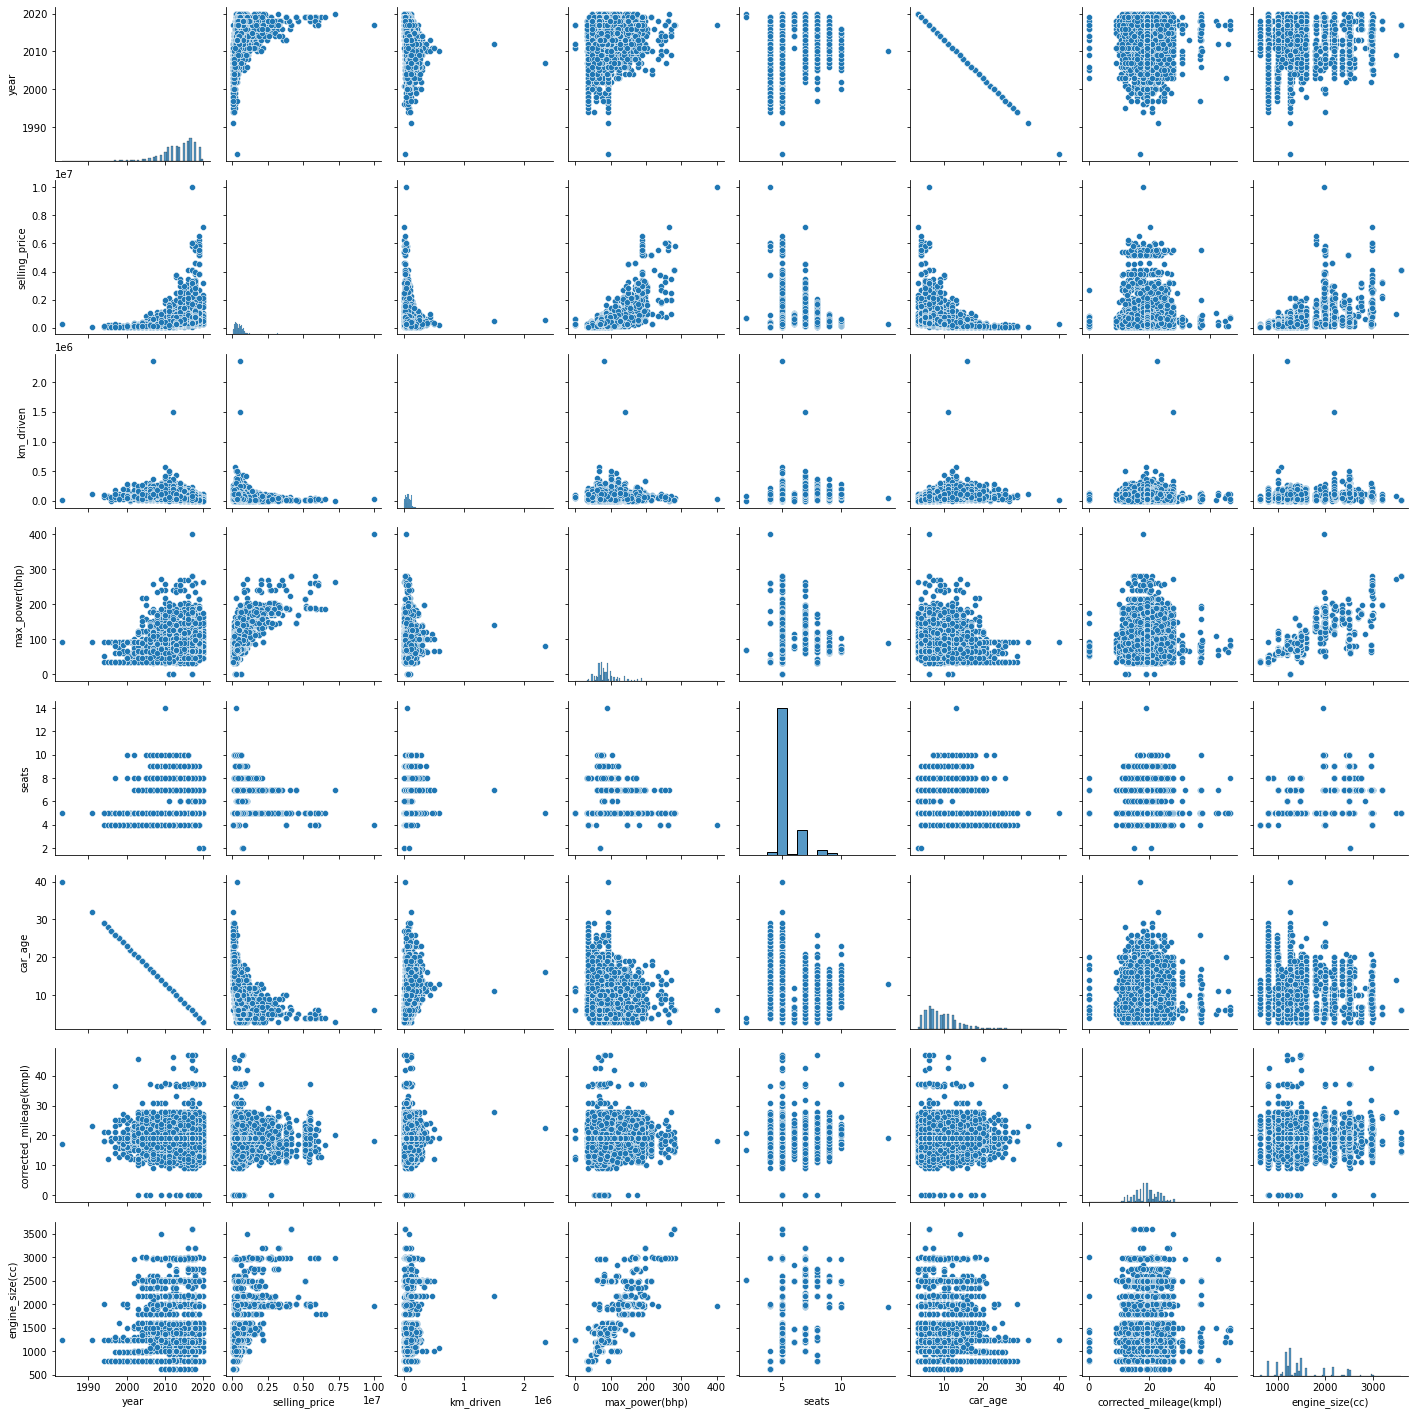

In [195]:
sns.pairplot(eda_df, kind = "scatter", palette = "icefire")

<AxesSubplot:>

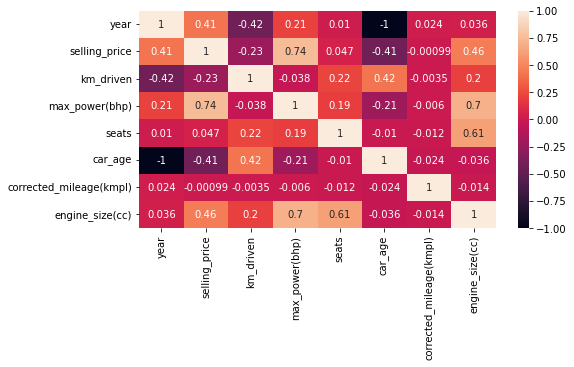

In [196]:
plt.figure(figsize = (8,4))
sns.heatmap(eda_df.corr(), annot = True )

- Analysis of linearity :
    .
    .
    .
    .
- Analysis of multi_colinearity : 
    .
    .
- Analysis of vif :
    

### Variance Inflation Factor

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [198]:
# df.to_numpy()

In [199]:
# variance_inflation_factor(main_df.to_numpy(), 1)

In [200]:
# df.info()

In [201]:
# vif_list = []
# for i in range(df.shape[1]):
#     vif = variance_inflation_factor(df.to_numpy(), i)
#     vif_list.append(vif)
    
# vif_list   

In [202]:
print("*"*127)

*******************************************************************************************************************************


# Feature Engineering

### create 2 datapframe (Training and Testing)

#### Encoding of object datatype feature :

In [203]:
main_df = df.copy()

In [205]:
main_df.drop('year', axis = 1, inplace = True)

In [206]:
categ_col.columns

Index(['fuel_type', 'seller_type', 'transmission', 'owner', 'manufacturer'], dtype='object')

In [207]:
# one hot encoding on some categorical column
main_df = pd.get_dummies(main_df, columns = ['fuel_type','seller_type'],drop_first= True, prefix = None)
main_df.head(2)

,selling_price,km_driven,transmission,owner,max_power(bhp),seats,manufacturer,car_age,corrected_mileage(kmpl),engine_size(cc),fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,450000,145500,Manual,First Owner,74.00,5.0,Maruti,9,23.0,1248.0,1,0,0,1,0
1,370000,120000,Manual,Second Owner,103.52,5.0,Skoda,9,21.1,1498.0,1,0,0,1,0


In [208]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [209]:
label_encode = LabelEncoder()
encode_transmission = label_encode.fit_transform(main_df[['transmission']])
main_df['transmission'] = encode_transmission
main_df.head(2)

,selling_price,km_driven,transmission,owner,max_power(bhp),seats,manufacturer,car_age,corrected_mileage(kmpl),engine_size(cc),fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,450000,145500,1,First Owner,74.00,5.0,Maruti,9,23.0,1248.0,1,0,0,1,0
1,370000,120000,1,Second Owner,103.52,5.0,Skoda,9,21.1,1498.0,1,0,0,1,0


In [210]:
label_encode = LabelEncoder()
encode_owner = label_encode.fit_transform(main_df[['owner']])
main_df['owner'] = encode_owner
main_df.head(2)

,selling_price,km_driven,transmission,owner,max_power(bhp),seats,manufacturer,car_age,corrected_mileage(kmpl),engine_size(cc),fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,450000,145500,1,0,74.00,5.0,Maruti,9,23.0,1248.0,1,0,0,1,0
1,370000,120000,1,2,103.52,5.0,Skoda,9,21.1,1498.0,1,0,0,1,0


In [211]:
onehot_encode = OneHotEncoder()
encode_manufacturer = onehot_encode.fit_transform(main_df[['manufacturer']])

manfact_df = pd.DataFrame(encode_manufacturer.toarray(),columns = main_df['manufacturer'].unique().tolist())
main_df = main_df.join(manfact_df, how='outer')
main_df.head(2)


,selling_price,km_driven,transmission,owner,max_power(bhp),seats,manufacturer,car_age,corrected_mileage(kmpl),engine_size(cc),...,MG,Volvo,Daewoo,Kia,Force,Ambassador,Ashok,Isuzu,Opel,Peugeot
0,450000,145500,1,0,74.00,5.0,Maruti,9,23.0,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,370000,120000,1,2,103.52,5.0,Skoda,9,21.1,1498.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [212]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 8128 non-null   int64  
 1   km_driven                     8128 non-null   int64  
 2   transmission                  8128 non-null   int32  
 3   owner                         8128 non-null   int32  
 4   max_power(bhp)                8128 non-null   float64
 5   seats                         8128 non-null   float64
 6   manufacturer                  8128 non-null   object 
 7   car_age                       8128 non-null   int64  
 8   corrected_mileage(kmpl)       8128 non-null   float64
 9   engine_size(cc)               8128 non-null   float64
 10  fuel_type_Diesel              8128 non-null   uint8  
 11  fuel_type_LPG                 8128 non-null   uint8  
 12  fuel_type_Petrol              8128 non-null   uint8  
 13  sel

## Handling Outliers

In [213]:
numeric_col.columns

Index(['year', 'selling_price', 'km_driven', 'max_power(bhp)', 'seats',
       'car_age', 'corrected_mileage(kmpl)', 'engine_size(cc)'],
      dtype='object')

In [214]:
main_df.km_driven.describe()

count    8.128000e+03
mean     6.981951e+04
std      5.655055e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.800000e+04
max      2.360457e+06
Name: km_driven, dtype: float64

<AxesSubplot:xlabel='km_driven'>

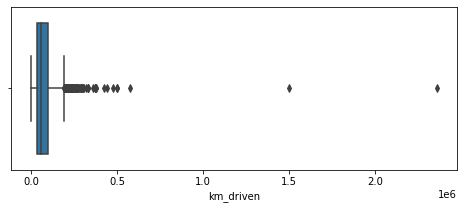

In [215]:
plt.figure(figsize = (8,3))
sns.boxplot(main_df.km_driven)

### check the outliers by knowing the Z-Score

#### 1. km_driven

In [216]:
# z_score = (main_df.km_driven[0] - main_df.km_driven.mean())/(main_df.km_driven).std()

In [217]:
from scipy.stats import zscore

In [218]:
# z_score = zscore(df['km_driven'])
# #

In [219]:
def get_outliers_km_driven(df):
    z_score = zscore(df['km_driven'])
    z_score_list = []
    index = np.where(np.abs(z_score) > 3)[0]
    for i in z_score :
        if i > np.abs(3):
            z_score_list.append(i)

    print(df['km_driven'].iloc[index]) 
    print("\n-->> no. of outliers present in 'km_driven' is : ",len((df['km_driven'].iloc[index])))
    return z_score_list

get_outliers_km_driven(main_df)

394     240000
401     265000
461     250000
886     300000
998     360003
         ...  
7645    250000
7945    250000
7969    250000
8030    300000
8077    250000
Name: km_driven, Length: 72, dtype: int64

-->> no. of outliers present in 'km_driven' is :  72


[3.0095364942952783,
 3.4516460023999125,
 3.186380297537132,
 4.0705993137464,
 5.131715186338494,
 4.0705993137464,
 4.671868244768702,
 25.29185570276883,
 4.0705993137464,
 5.396927838060302,
 4.0705993137464,
 3.2748021991580587,
 5.4853497396812285,
 3.540067904020839,
 4.0705993137464,
 3.1510115368887615,
 3.628489805641766,
 3.3632241007789854,
 3.0095364942952783,
 4.0705993137464,
 4.0705993137464,
 3.3632241007789854,
 40.50850454337639,
 8.976493996999956,
 3.186380297537132,
 3.186380297537132,
 7.607475378583471,
 4.601130723471961,
 3.911439890828732,
 3.186380297537132,
 3.4516460023999125,
 3.1156427762403904,
 3.0095364942952783,
 4.159021215367327,
 3.433961622075727,
 4.035230553098029,
 3.540067904020839,
 3.9287175304054607,
 3.1545484129535986,
 3.0449052549436493,
 4.0705993137464,
 3.0095364942952783,
 3.8937555105045463,
 3.540067904020839,
 3.186380297537132,
 7.165365870478838,
 6.54641255913235,
 3.8053336088836196,
 3.186380297537132,
 6.298831234593755,


In [220]:
# def get_outliers(df):
#     for j in numeric_col:
#         print('Feature : ',j)
#         z_score = zscore(df[j])
#         z_score_list = []
#         index = np.where(np.abs(z_score) > 3)[0]
#         for i in z_score :
#             if i > np.abs(3):
#                 z_score_list.append(i)

#         print(df[i].iloc[index]) 
#         print(f"\n-->> no. of outliers present in {j} is : ",len((df[i].iloc[index])))
#     return z_score_list

# get_outliers(main_df)

###  check the outliers by knowing the IQR, Upper_Tail and Lower_Tail

In [221]:
def inter_quantile_range(main_df):
    q1 = main_df["km_driven"].quantile(0.25)
    q2 = main_df["km_driven"].quantile(0.50)
    q3 = main_df["km_driven"].quantile(0.75)
    print("quantile 1 :", q1)
    print("quantile 2  :", q2)
    print("quantile 3  :", q3)
    iqr = q3 - q1
    print("IQR : ", iqr)
    upper_tail = q3 + 2.5 * iqr
    lower_tail = q1 - 2.5 * iqr

    print("Upper Tail :", upper_tail)
    print("Lower Tail :", lower_tail)
#     print("no. of records having value greater than upper tail : ", len(main_df['km_driven'].loc[df['km_driven'] > upper_tail][0]))
    return main_df['km_driven'].loc[df['km_driven'] > upper_tail]

In [222]:
inter_quantile_range(main_df)

quantile 1 : 35000.0
quantile 2  : 60000.0
quantile 3  : 98000.0
IQR :  63000.0
Upper Tail : 255500.0
Lower Tail : -122500.0


401      265000
886      300000
998      360003
1237     300000
1629     334000
1810    1500000
1997     300000
2006     375000
2036     300000
2272     380000
2402     270000
2579     300000
2726     275000
2805     260000
2977     300000
2999     300000
3120     260000
3486    2360457
3508     577414
3641     500000
3852     330000
3873     291000
4117     265000
4570     305000
4630     264000
4653     298000
4654     270000
4664     291977
4861     300000
4998     290000
5057     270000
5106     475000
5189     440000
5323     285000
5467     426000
5813     330000
5871     370000
6200     320000
6673     500000
6782     271000
7042     260000
7102     376412
7524     280000
7633     265000
8030     300000
Name: km_driven, dtype: int64

- from above analysis and calculation of outliers we decided to handle the outliers by imputation and transformation technique

In [223]:
print("******overall mean and median of km_driven with outliers******")
print("mean :",main_df["km_driven"].mean())
print("median :",main_df["km_driven"].median())

******overall mean and median of km_driven with outliers******
mean : 69819.51082677166
median : 60000.0


<AxesSubplot:xlabel='km_driven'>

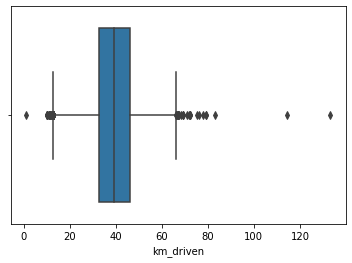

In [224]:
sns.boxplot(x = np.cbrt(main_df["km_driven"]))

Upper Tail : 255500.0
Lower Tail : -122500.0
Mean without outliers: 67994.89310899419
Mean without outliers: 60000.0


<AxesSubplot:xlabel='km_driven'>

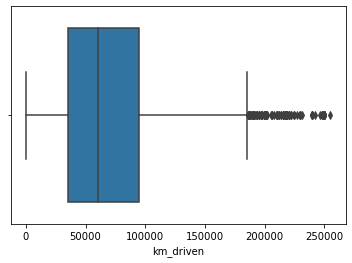

In [225]:
q1 = main_df["km_driven"].quantile(0.25)
q2 = main_df["km_driven"].quantile(0.50)
q3 = main_df["km_driven"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 2.5 * iqr
lower_tail = q1 - 2.5 * iqr
print("Upper Tail :", upper_tail)
print("Lower Tail :", lower_tail)

mean_km_driven_wo = main_df["km_driven"].loc[main_df['km_driven'] <= upper_tail].mean()
print("Mean without outliers:", mean_km_driven_wo)

median_km_driven = main_df["km_driven"].loc[main_df['km_driven'] <= upper_tail].median()
print("Mean without outliers:", median_km_driven)

main_df['km_driven'].loc[main_df['km_driven'] > upper_tail] = mean_km_driven_wo

sns.boxplot(x = main_df['km_driven'])

In [226]:
# sns.boxplot(x= np.log(main_df['km_driven']))

In [227]:
print("******overall mean and median of km_driven after handling outliers******")
print("mean :",main_df["km_driven"].mean())
print("median :",main_df["km_driven"].median())

******overall mean and median of km_driven after handling outliers******
mean : 67994.89310899425
median : 60000.0


In [228]:
# get_outliers_km_driven(main_df)

In [229]:
# with z_score >3 imputation
# median_km_driven = main_df["km_driven"].loc[main_df['km_driven'] <= upper_tail].median()
# print("median without outliers:", median_km_driven)
# z_score = zscore(df['km_driven'])
# z_score_list = []
# index = np.where(np.abs(z_score) > 3)[0]
# for i in z_score :
#     if i > np.abs(3):
#         z_score_list.append(i)

# # print(df['km_driven'].iloc[index])
# main_df['km_driven'].loc[np.where(np.abs(z_score) > 3)[0]] = median_km_driven

In [230]:
# sns.boxplot(x = np.sqrt(main_df["km_driven"]))
def transformation_km_driven(df):
    main_df['km_driven'] = np.sqrt(main_df['km_driven'])
    return main_df['km_driven']
    

In [231]:
transformation_km_driven(main_df)

0       381.444622
1       346.410162
2       374.165739
3       356.370594
4       346.410162
           ...    
8123    331.662479
8124    344.963766
8125    346.410162
8126    158.113883
8127    158.113883
Name: km_driven, Length: 8128, dtype: float64

<AxesSubplot:xlabel='km_driven'>

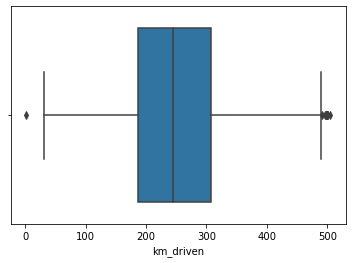

In [232]:
sns.boxplot(x = (main_df["km_driven"]))

In [233]:
numeric_col.columns

Index(['year', 'selling_price', 'km_driven', 'max_power(bhp)', 'seats',
       'car_age', 'corrected_mileage(kmpl)', 'engine_size(cc)'],
      dtype='object')

### max_power(bhp)

<AxesSubplot:xlabel='max_power(bhp)'>

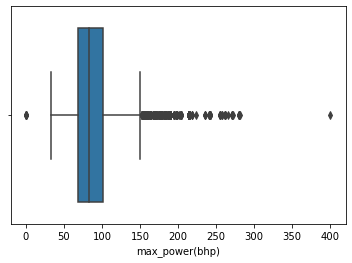

In [234]:
sns.boxplot(x = main_df['max_power(bhp)'])

In [235]:
def get_outliers_km_driven(df):
    z_score = zscore(df['max_power(bhp)'])
    z_score_list = []
    index = np.where(np.abs(z_score) > 3)[0]
    for i in z_score :
        if i > np.abs(3):
            z_score_list.append(i)

    print(df['max_power(bhp)'].iloc[index]) 
    print("\n-->> no. of outliers present in 'max_power(bhp)' is : ",len((df['max_power(bhp)'].iloc[index])))
    return z_score_list

get_outliers_km_driven(main_df)

132     214.56
134     280.00
136     254.79
141     204.00
146     241.40
         ...  
7713    254.79
7775    241.40
7808    254.80
7859    214.56
7919    203.00
Name: max_power(bhp), Length: 94, dtype: float64

-->> no. of outliers present in 'max_power(bhp)' is :  94


[3.48156050431159,
 5.333230416918108,
 4.61989608781037,
 3.1827580245266747,
 4.241016807098249,
 5.3898217956652505,
 8.728713141746686,
 3.48156050431159,
 3.48156050431159,
 3.5788976757566755,
 3.48156050431159,
 3.1827580245266747,
 4.22969853134882,
 3.1827580245266747,
 4.806930594569677,
 3.48156050431159,
 3.48156050431159,
 3.48156050431159,
 3.48156050431159,
 3.48156050431159,
 5.333230416918108,
 3.48156050431159,
 3.0271317329720313,
 3.48156050431159,
 5.333230416918108,
 4.241016807098249,
 4.241016807098249,
 3.5788976757566755,
 4.241016807098249,
 3.48156050431159,
 3.48156050431159,
 4.6201790447041065,
 4.710725250699535,
 5.075739643618607,
 4.908795076314536,
 3.48156050431159,
 3.48156050431159,
 5.333230416918108,
 3.7486718119981046,
 4.241016807098249,
 3.48156050431159,
 3.1827580245266747,
 3.48156050431159,
 3.48156050431159,
 3.0200578106286384,
 4.241016807098249,
 4.22969853134882,
 3.1827580245266747,
 4.806930594569677,
 3.48156050431159,
 3.4815605

In [236]:
def inter_quantile_range(main_df):
    q1 = main_df["max_power(bhp)"].quantile(0.25)
    q2 = main_df["max_power(bhp)"].quantile(0.50)
    q3 = main_df["max_power(bhp)"].quantile(0.75)
    print("quantile 1 :", q1)
    print("quantile 2  :", q2)
    print("quantile 3  :", q3)
    iqr = q3 - q1
    print("IQR : ", iqr)
    upper_tail = q3 + 2.5 * iqr
    lower_tail = q1 - 2.5 * iqr

    print("Upper Tail :", upper_tail)
    print("Lower Tail :", lower_tail)
#     print("no. of records having value greater than upper tail : ", len(main_df['km_driven'].loc[df['km_driven'] > upper_tail][0]))
    return main_df['max_power(bhp)'].loc[df['max_power(bhp)'] > upper_tail]

In [237]:
inter_quantile_range(main_df)

quantile 1 : 68.1
quantile 2  : 83.1
quantile 3  : 101.25
IQR :  33.150000000000006
Upper Tail : 184.125
Lower Tail : -14.77500000000002


59      187.74
82      189.00
131     188.00
132     214.56
134     280.00
         ...  
7872    190.00
7873    190.00
7919    203.00
7930    190.00
8023    194.30
Name: max_power(bhp), Length: 254, dtype: float64

In [238]:
print("******overall mean and median of km_driven with outliers******")
print("mean :",main_df["max_power(bhp)"].mean())
print("median :",main_df["max_power(bhp)"].median())

******overall mean and median of km_driven with outliers******
mean : 91.51791898382166
median : 83.1


Upper Tail : 184.125
Lower Tail : -14.77500000000002
Mean without outliers: 87.82104464065286
Mean without outliers: 82.0


<AxesSubplot:xlabel='max_power(bhp)'>

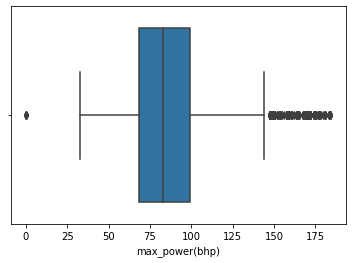

In [239]:
q1 = main_df["max_power(bhp)"].quantile(0.25)
q2 = main_df["max_power(bhp)"].quantile(0.50)
q3 = main_df["max_power(bhp)"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 2.5 * iqr
lower_tail = q1 - 2.5 * iqr
print("Upper Tail :", upper_tail)
print("Lower Tail :", lower_tail)

mean_max_powerbhp_wo = main_df["max_power(bhp)"].loc[main_df['max_power(bhp)'] <= upper_tail].mean()
print("Mean without outliers:", mean_max_powerbhp_wo)

median_max_power_bhp = main_df["max_power(bhp)"].loc[main_df['max_power(bhp)'] <= upper_tail].median()
print("Mean without outliers:", median_max_power_bhp)

main_df['max_power(bhp)'].loc[main_df['max_power(bhp)'] > upper_tail] = mean_max_powerbhp_wo

sns.boxplot(x = main_df['max_power(bhp)'])

### corrected_mileage(kmpl)

In [240]:
print("******overall mean and median of corrected_mileage(kmpl) with outliers******")
print("mean :",main_df["max_power(bhp)"].mean())
print("median :",main_df["max_power(bhp)"].median())


******overall mean and median of corrected_mileage(kmpl) with outliers******
mean : 87.82104464065307
median : 83.1


<AxesSubplot:xlabel='corrected_mileage(kmpl)'>

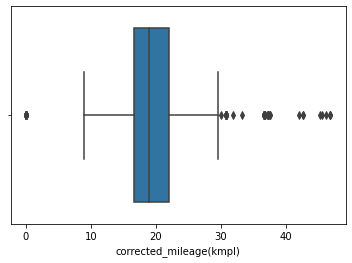

In [241]:
sns.boxplot(x = main_df['corrected_mileage(kmpl)'])

Upper Tail : 35.25
Lower Tail : 3.4499999999999975
Mean without outliers: 19.1871991925915
Mean without outliers: 19.0


<AxesSubplot:xlabel='corrected_mileage(kmpl)'>

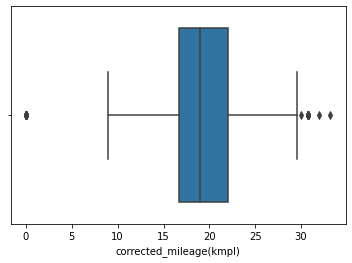

In [242]:
q1 = main_df["corrected_mileage(kmpl)"].quantile(0.25)
q2 = main_df["corrected_mileage(kmpl)"].quantile(0.50)
q3 = main_df["corrected_mileage(kmpl)"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 2.5 * iqr
lower_tail = q1 - 2.5 * iqr
print("Upper Tail :", upper_tail)
print("Lower Tail :", lower_tail)

mean_corrected_mileage_wo = main_df["corrected_mileage(kmpl)"].loc[main_df['corrected_mileage(kmpl)'] <= upper_tail].mean()
print("Mean without outliers:", mean_corrected_mileage_wo)

median_corrected_mileage = main_df["corrected_mileage(kmpl)"].loc[main_df['corrected_mileage(kmpl)'] <= upper_tail].median()
print("Mean without outliers:", median_corrected_mileage)

main_df['corrected_mileage(kmpl)'].loc[main_df['corrected_mileage(kmpl)'] > upper_tail] = median_corrected_mileage

sns.boxplot(x = main_df['corrected_mileage(kmpl)'])

In [243]:
print("******overall mean and median of corrected_mileage(kmpl) after handling outliers******")
print("mean :",main_df["max_power(bhp)"].mean())
print("median :",main_df["max_power(bhp)"].median())

******overall mean and median of corrected_mileage(kmpl) after handling outliers******
mean : 87.82104464065307
median : 83.1


### engine_size(cc)

******overall mean and median of engine_size(cc) with outliers******
mean : 1452.8981299212599
median : 1248.0


<AxesSubplot:xlabel='engine_size(cc)'>

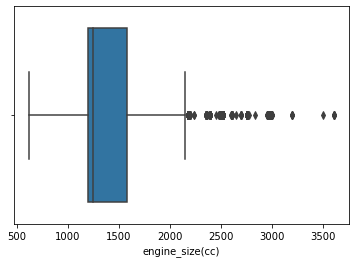

In [244]:
print("******overall mean and median of engine_size(cc) with outliers******")
print("mean :",main_df["engine_size(cc)"].mean())
print("median :",main_df["engine_size(cc)"].median())
sns.boxplot(x = main_df['engine_size(cc)'])

Upper Tail : 2544.5
Lower Tail : 234.5
Mean without outliers: 1421.4675128817394
Mean without outliers: 1248.0


<AxesSubplot:xlabel='engine_size(cc)'>

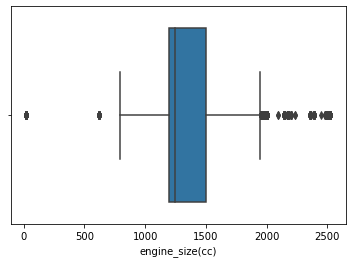

In [245]:
q1 = main_df["engine_size(cc)"].quantile(0.25)
q2 = main_df["engine_size(cc)"].quantile(0.50)
q3 = main_df["engine_size(cc)"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 2.5 * iqr
lower_tail = q1 - 2.5 * iqr
print("Upper Tail :", upper_tail)
print("Lower Tail :", lower_tail)

mean_engine_size = main_df["engine_size(cc)"].loc[main_df['engine_size(cc)'] <= upper_tail].mean()
print("Mean without outliers:", mean_engine_size)

median_engine_size = main_df["engine_size(cc)"].loc[main_df['engine_size(cc)'] <= upper_tail].median()
print("Mean without outliers:", median_engine_size)

main_df['engine_size(cc)'].loc[main_df['engine_size(cc)'] > upper_tail] = median_corrected_mileage

sns.boxplot(x = main_df['engine_size(cc)'])

In [246]:
print("******overall mean and median of corrected_mileage(kmpl) after handling outliers******")
print("mean :",main_df["max_power(bhp)"].mean())
print("median :",main_df["max_power(bhp)"].median())

******overall mean and median of corrected_mileage(kmpl) after handling outliers******
mean : 87.82104464065307
median : 83.1


Upper Tail : 2250.5
Lower Tail : 444.5
Mean without outliers: 1302.535780792764
Mean without outliers: 1248.0


<AxesSubplot:xlabel='engine_size(cc)'>

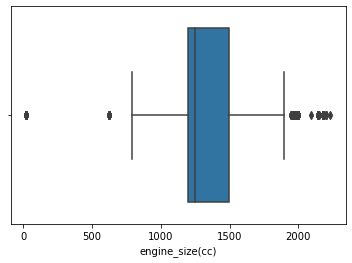

In [247]:
q1 = main_df["engine_size(cc)"].quantile(0.25)
q2 = main_df["engine_size(cc)"].quantile(0.50)
q3 = main_df["engine_size(cc)"].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 2.5 * iqr
lower_tail = q1 - 2.5 * iqr
print("Upper Tail :", upper_tail)
print("Lower Tail :", lower_tail)

mean_engine_size = main_df["engine_size(cc)"].loc[main_df['engine_size(cc)'] <= upper_tail].mean()
print("Mean without outliers:", mean_engine_size)

median_engine_size = main_df["engine_size(cc)"].loc[main_df['engine_size(cc)'] <= upper_tail].median()
print("Mean without outliers:", median_engine_size)

main_df['engine_size(cc)'].loc[main_df['engine_size(cc)'] > upper_tail] = mean_engine_size

sns.boxplot(x = main_df['engine_size(cc)'])

# Model Building & Evaluation

In [248]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Model Training

In [249]:
main_df.columns

Index(['selling_price', 'km_driven', 'transmission', 'owner', 'max_power(bhp)',
       'seats', 'manufacturer', 'car_age', 'corrected_mileage(kmpl)',
       'engine_size(cc)', 'fuel_type_Diesel', 'fuel_type_LPG',
       'fuel_type_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'Maruti', 'Skoda', 'Honda', 'Hyundai',
       'Toyota', 'Ford', 'Renault', 'Mahindra', 'Tata', 'Chevrolet', 'Fiat',
       'Datsun', 'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen',
       'BMW', 'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype='object')

In [250]:
main_df.drop('manufacturer', axis = 1, inplace = True)

In [251]:
# X = main_df.drop('selling_price', axis = 1)
# y = main_df['selling_price']

In [255]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 8128 non-null   int64  
 1   km_driven                     8128 non-null   float64
 2   transmission                  8128 non-null   int32  
 3   owner                         8128 non-null   int32  
 4   max_power(bhp)                8128 non-null   float64
 5   seats                         8128 non-null   float64
 6   car_age                       8128 non-null   int64  
 7   corrected_mileage(kmpl)       8128 non-null   float64
 8   engine_size(cc)               8128 non-null   float64
 9   fuel_type_Diesel              8128 non-null   uint8  
 10  fuel_type_LPG                 8128 non-null   uint8  
 11  fuel_type_Petrol              8128 non-null   uint8  
 12  seller_type_Individual        8128 non-null   uint8  
 13  sel

In [257]:
main_df.Tata.unique()

array([0., 1.])

In [258]:
print(main_df['Tata'].dtypes)

float64


### Spliting data into training and testing

In [252]:
# X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 7)

In [253]:
# X_train.head(3)

### `though our data is not linear but it is not multicolinear as well, hence we are applying Linear Regression first.`

### Linear Regression

In [254]:
print("**************Linear Regression Model*****************")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class ModelBuilding:
    def __init__(self):
#         self.df = pd.read_csv(datafile)
        self.linear_reg = LinearRegression()
    
    def split(self, test_size):
        print("-->> feature splitted successfully")
        X = main_df.drop('selling_price', axis = 1)
        y = main_df['selling_price']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = test_size, random_state = 7)
    def fit(self):
        print("-->> model is fitted successfully")
        self.model = self.linear_reg.fit(self.X_train, self.y_train)
    def predict(self):
        print("-->> prediction from model after learning :")
        self.result_train = self.linear_reg.predict(self.X_train)
        self.result_test = self.linear_reg.predict(self.X_test)
        return "Training Prediction :",self.result_train[:5], "Testing Prediction :",self.result_test[:5]
    def evaluation(self):
        print("\n-->> Evaluation of Model")
        self.mse = mean_squared_error(self.y_train , self.result_train)
        print('Mean squared error of training data         :', self.mse)
        self.rmse = np.sqrt(self.mse)
        print('Root Mean squared error of training data    :', self.rmse)
        self.mae = mean_absolute_error(self.y_train , self.result_train)
        print('Mean absolute error of training data        :', self.mae)
        self.r2_value = r2_score(self.y_train,self.result_train)
        print('R2 score of training data                   :', self.r2_value)

# if __name__ == '__main__':
model_instance = ModelBuilding()
model_instance.split(0.2)
model_instance.fit() 
print(model_instance.predict()) 
model_instance.evaluation()
print()
print("Training Accuracy   : ",     model_instance.model.score(model_instance.X_train, model_instance.y_train))
print("Testing Accuracy    : ",     model_instance.model.score(model_instance.X_test, model_instance.y_test))

**************Linear Regression Model*****************
-->> feature splitted successfully
-->> model is fitted successfully
-->> prediction from model after learning :
('Training Prediction :', array([724610.87138227, 303914.50950368, 167196.03922647, 786819.10595099,
       738199.43871821]), 'Testing Prediction :', array([262513.57428314, 655557.5649439 , 366932.00222521, 367848.93683383,
       314664.59667074]))

-->> Evaluation of Model
Mean squared error of training data         : 119516761715.4705
Root Mean squared error of training data    : 345711.9635122142
Mean absolute error of training data        : 170878.11158239617
R2 score of training data                   : 0.8240279370299939

Training Accuracy   :  0.8240279370299939
Testing Accuracy    :  0.7917503584116368


### Decision Tree Regressor

In [ ]:
print("**************Decision Tree Regressor Model*****************")
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class ModelDecisionTree:
    def __init__(self):

        self.decision_tree_model = DecisionTreeRegressor()
    
    def split(self, test_size):
        print("-->> feature splitted successfully")
        X = main_df.drop('selling_price', axis = 1)
        y = main_df['selling_price']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = test_size, random_state = 7)
    def fit(self):
        print("-->> model is fitted successfully")
        self.model = self.decision_tree_model.fit(self.X_train, self.y_train)
    def predict(self):
        print("-->> prediction from model after learning :")
        self.result_train = self.decision_tree_model.predict(self.X_train)
        self.result_test = self.decision_tree_model.predict(self.X_test)
        return "Training Prediction :",self.result_train[:5], "Testing Prediction :",self.result_test[:5]
    def evaluation(self):
        print("\n-->> Evaluation of Model")
        self.mse = mean_squared_error(self.y_train , self.result_train)
        print('Mean squared error of training data         :', self.mse)
        self.rmse = np.sqrt(self.mse)
        print('Root Mean squared error of training data    :', self.rmse)
        self.mae = mean_absolute_error(self.y_train , self.result_train)
        print('Mean absolute error of training data        :', self.mae)
        self.r2_value = r2_score(self.y_train,self.result_train)
        print('R2 score of training data                   :', self.r2_value)

# if __name__ == '__main__':
model_instance = ModelDecisionTree()
model_instance.split(0.2)
model_instance.fit() 
print(model_instance.predict()) 
model_instance.evaluation()
print()
print("Training Accuracy   : ",     model_instance.model.score(model_instance.X_train, model_instance.y_train))
print("Testing Accuracy    : ",     model_instance.model.score(model_instance.X_test, model_instance.y_test))

### Decion Tree with Hyperparameter Tuning

#### Decion Tree with RandomizedSearchCV"

In [ ]:
print("**************Decision Tree Regressor With Hyperparameter Tuning*****************")
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


class HypertuneDecisionTreeModel:
    def __init__(self):

        self.decision_tree_model = DecisionTreeRegressor()
    
    def split(self, test_size):
        print("-->> feature splitted successfully")
        X = main_df.drop('selling_price', axis = 1)
        y = main_df['selling_price']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = test_size, random_state = 7)
    
    def fit(self):
        print("-->> model is fitted successfully")
        self.model = self.decision_tree_model.fit(self.X_train, self.y_train)
        
    def hyperparameters(self):
        print("********Hyperparameter Tuning**********")
        
        self.hyper_params = {"criterion" : ["squared_error", "absolute_error", "poisson"],
                  "max_depth" : np.arange(3,14),
                  "min_samples_split" : np.arange(2,20),
                  "min_samples_leaf" : np.arange(2,5)}
        
        self.randomized_search_cv = RandomizedSearchCV(self.decision_tree_model, self.hyper_params, cv = 4)
        self.randomized_search_cv.fit(self.X_train, self.y_train)
        print("Best Estimators   :", self.randomized_search_cv.best_estimator_)
        print("Best Params :: :: :: " ,self.randomized_search_cv.best_params_ )
        self.rscv_dt_model = self.randomized_search_cv.best_estimator_
        self.rscv_dt_model.fit(self.X_train,self.y_train)
        return self.rscv_dt_model
        
    def predict(self):
        print("-->> prediction from model after learning :")
        self.result_train = self.rscv_dt_model.predict(self.X_train)
        self.result_test = self.rscv_dt_model.predict(self.X_test)
        return "Training Prediction :",self.result_train[:5], "Testing Prediction :",self.result_test[:5]
    def evaluation(self):
        print("\n-->> Evaluation of Model")
        self.mse = mean_squared_error(self.y_train , self.result_train)
        print('Mean squared error of training data         :', self.mse)
        self.rmse = np.sqrt(self.mse)
        print('Root Mean squared error of training data    :', self.rmse)
        self.mae = mean_absolute_error(self.y_train , self.result_train)
        print('Mean absolute error of training data        :', self.mae)
        self.r2_value = r2_score(self.y_train,self.result_train)
        print('R2 score of training data                   :', self.r2_value)
        self.r2_value = r2_score(self.y_test,self.result_test)
        print('R2 score of Testing data                    :', self.r2_value)

# if __name__ == '__main__':
model_instance = HypertuneDecisionTreeModel()
model_instance.split(0.2)
model_instance.fit() 
model_instance.hyperparameters()
print(model_instance.predict()) 
model_instance.evaluation()
print()
print("Training Accuracy   : ",     model_instance.model.score(model_instance.X_train, model_instance.y_train))
print("Testing Accuracy    : ",     model_instance.model.score(model_instance.X_test, model_instance.y_test))

####  Decion Tree with GridSearchCV

In [ ]:
# print("**************Decision Tree Regressor With Hyperparameter Tuning*****************")
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# class HypertuneDecisionTreeModel:
#     def __init__(self):

#         self.decision_tree_model = DecisionTreeRegressor()
    
#     def split(self, test_size):
#         print("-->> feature splitted successfully")
#         X = main_df.drop('selling_price', axis = 1)
#         y = main_df['selling_price']
#         self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = test_size, random_state = 7)
    
#     def fit(self):
#         print("-->> model is fitted successfully")
#         self.model = self.decision_tree_model.fit(self.X_train, self.y_train)
        
#     def hyperparameters(self):
#         print("********Hyperparameter Tuning**********")
        
#         self.hyper_params = {"criterion" : ["squared_error", "absolute_error", "poisson"],
#                   "max_depth" : np.arange(3,14),
#                   "min_samples_split" : np.arange(2,20),
#                   "min_samples_leaf" : np.arange(2,5)}
        
#         self.grid_search_cv = GridSearchCV(self.decision_tree_model, self.hyper_params, cv = 4)
#         self.grid_search_cv.fit(X_train, y_train)
#         print("Best Estimators   :", self.grid_search_cv.best_estimator_)
        
#         self.grid_search_cv_model = self.grid_search_cv.best_estimator_
#         self.grid_search_cv_model.fit(X_train,y_train)
        
#         return self.grid_search_cv_model
        
#     def predict(self):
#         print("-->> prediction from model after learning :")
#         self.result_train = self.grid_search_cv_model.predict(self.X_train)
#         self.result_test = self.grid_search_cv_model.predict(self.X_test)
        
#         return "Training Prediction :",self.result_train[:5], "Testing Prediction :",self.result_test[:5]
    
#     def evaluation(self):
#         print("\n-->> Evaluation of Model")
#         self.mse = mean_squared_error(self.y_train , self.result_train)
#         print('Mean squared error of training data         :', self.mse)
#         self.rmse = np.sqrt(self.mse)
#         print('Root Mean squared error of training data    :', self.rmse)
#         self.mae = mean_absolute_error(self.y_train , self.result_train)
#         print('Mean absolute error of training data        :', self.mae)
#         self.r2_value = r2_score(self.y_train,self.result_train)
#         print('R2 score of training data                   :', self.r2_value)
        

# # if __name__ == '__main__':
# model_instance_gscv = HypertuneDecisionTreeModel()
# model_instance_gscv.split(0.2)
# model_instance_gscv.fit() 
# model_instance_gscv.hyperparameters()
# print(model_instance_gscv.predict()) 
# model_instance_gscv.evaluation()
# print()
# print("Training Accuracy   : ",     model_instance_gscv.model.score(model_instance_gscv.X_train, model_instance_gscv.y_train))
# print("Testing Accuracy    : ",     model_instance_gscv.model.score(model_instance_gscv.X_test, model_instance_gscv.y_test))

### Model Building with RandomForestRegressor

In [ ]:
print("**************Random Forest Regressor Model*****************")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

class ModelRandomForest:
    def __init__(self,randomstate):

        self.random_forest_model = RandomForestClassifier()
        self.rs = randomstate
    
    def split(self, test_size):
        print("-->> feature splitted successfully")
        X = main_df.drop('selling_price', axis = 1)
        y = main_df['selling_price']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = test_size, random_state = self.rs)
        
    def fit(self):
        print("-->> model is fitted successfully")
        self.model = self.random_forest_model.fit(self.X_train, self.y_train)
        
    def predict(self):
        print("-->> prediction from model after learning :")
        self.result_train = self.random_forest_model.predict(self.X_train)
        self.result_test = self.random_forest_model.predict(self.X_test)
        return "Training Prediction :",self.result_train[:5], "Testing Prediction :",self.result_test[:5]
    def evaluation(self):
        print("\n-->> Training Evaluation of Model")
        self.mse = mean_squared_error(self.y_train , self.result_train)
        print('Mean squared error of training data         :', self.mse)
        self.rmse = np.sqrt(self.mse)
        print('Root Mean squared error of training data    :', self.rmse)
        self.mae = mean_absolute_error(self.y_train , self.result_train)
        print('Mean absolute error of training data        :', self.mae,"\n")
        self.r2_value = r2_score(self.y_train,self.result_train)
        print('R2 score of Training data                   :', self.r2_value)
        self.r2_value = r2_score(self.y_test,self.result_test)
        print('R2 score of Testing data                    :', self.r2_value)

# if __name__ == '__main__':
model_instance = ModelRandomForest(7)
model_instance.split(0.25)
model_instance.fit() 
print(model_instance.predict()) 
model_instance.evaluation()
print()
print("Accuracy of model   : ",     model_instance.model.score(model_instance.X_train, model_instance.y_train))
# print("Testing Accuracy    : ",     model_instance.model.score(model_instance.X_test, model_instance.y_test))

## Saving Model

### Model Dump

In [ ]:
import pickle
import json

In [ ]:
with open("car_price_pred_model.pkl", "wb") as f:
    pickle.dump(main_df, f)

In [ ]:
with open("one_hot_encode_manufacturer.pkl", "wb") as f:
    pickle.dump(encode_manufacturer, f)

In [ ]:
with open("label_encode_transmission.pkl", "wb") as f:
    pickle.dump(encode_transmission, f)

In [ ]:
with open("label_encode_owner.pkl", "wb") as f:
    pickle.dump(encode_owner, f)

In [ ]:
main_df.columns

In [ ]:
# train_data = main_df.copy()
# train_data.drop()

In [ ]:
df.corr()

In [ ]:
project_data = {"Column Names": main_df.columns.tolist()}
project_data

In [ ]:
with open('Column_Names.json', 'w') as f:
    json.dump(project_data, f)

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(100,60))
ax = df[['km_driven','selling_price']][df.km_driven<50000].groupby('km_driven').mean().plot.bar(rot=0)
ax.set_ylabel('Churn Rate')
# plt.savefig('avg_dist_churn')
plt.show()

In [ ]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'manufacturer', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

# plt.title("Count of cars based on manufacturers")
# plt.xlabel("Manufacturer")
# plt.ylabel("Count of cars")

In [ ]:
eda_df.columns

In [ ]:
# sns.FacetGrid(df,hue="fuel_type",size=5).map(plt.scatter,"purchase_year","transmission").add_legend()
# plt.show()

In [ ]:
eda_df.columns

In [ ]:
np.zeros((1,3))[0]